    INFO : 2020-05-11 21:06:25,417 : start: calc_avg_score
    INFO : 2020-05-11 21:06:27,310 : score[  0]: 0.04203
    INFO : 2020-05-11 21:06:28,621 : score[  1]: 0.04013
    INFO : 2020-05-11 21:06:30,263 : score[  2]: 0.03697
    INFO : 2020-05-11 21:06:31,433 : score[  3]: 0.04159
    INFO : 2020-05-11 21:06:32,731 : score[  4]: 0.04169
    INFO : 2020-05-11 21:06:33,861 : score[  5]: 0.03778
    INFO : 2020-05-11 21:06:34,950 : score[  6]: 0.03882
    INFO : 2020-05-11 21:06:36,070 : score[  7]: 0.03358
    INFO : 2020-05-11 21:06:37,205 : score[  8]: 0.03892
    INFO : 2020-05-11 21:06:38,341 : score[  9]: 0.03655
    INFO : 2020-05-11 21:06:39,471 : score[ 10]: 0.04223
    INFO : 2020-05-11 21:06:40,584 : score[ 11]: 0.03468
    INFO : 2020-05-11 21:06:41,775 : score[ 12]: 0.03370
    INFO : 2020-05-11 21:06:42,930 : score[ 13]: 0.03898
    INFO : 2020-05-11 21:06:44,046 : score[ 14]: 0.04052
    INFO : 2020-05-11 21:06:45,279 : score[ 15]: 0.03591
    INFO : 2020-05-11 21:06:4

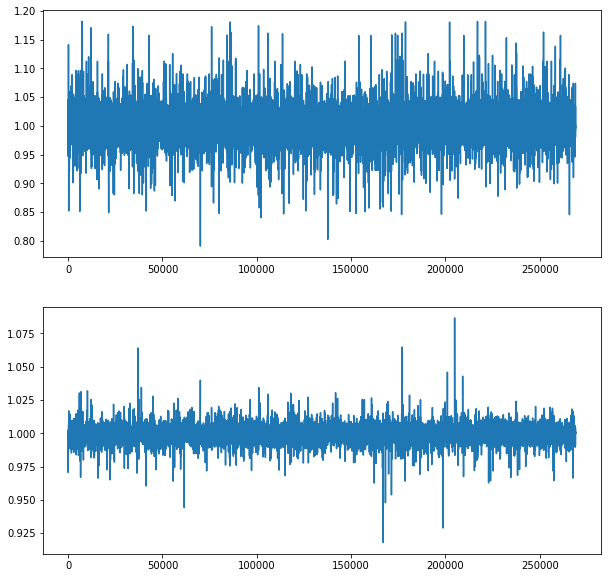

In [18]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import bitcoin
%matplotlib inline

def plot(x, y_result, y_predict):
    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_result)
    ax2.plot(list(range(len(x))), y_predict)
    plt.show()

def main():
    file_name = "v0.0.10-test"
    csv = pd.read_csv("datasets/" + file_name + ".csv")
    # 最後20%のデータでテスト
    test_start = int(len(csv) * 0.8)
    csv = csv[:test_start]

    bitcoin.calc_avg_score(csv)
    (
        data_train,
        data_test,
        label_train,
        label_test,
    ) = bitcoin.set_train_test_dataset(csv, 0.2)
    model = bitcoin.create_model(data_train, label_train)

    x = data_test#[-3500:]
    y_result = list(label_test)#[-3500:]
    y_predict = list(model.predict(x))
    plot(x, y_result, y_predict)

    with open("models/" + file_name + ".pickle", mode="wb") as file:
        pickle.dump(model, file)
    

if __name__ == "__main__":
    main()

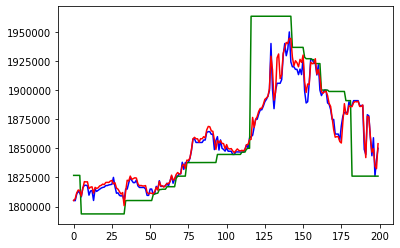

In [28]:
from mylib import bitcoin

file_name = "v0.0.10-2"
csv = pd.read_csv("datasets/" + file_name + ".csv")
with open("models/" + file_name + ".pickle", mode="rb") as file:
    model = pickle.load(file)

x = csv[416800:417000]
x.reset_index(drop=True, inplace=True)
y_close = list(x["close"])
y_extreme60 = list(x["open"] * x["extreme60"])
p = list(model.predict(x[bitcoin.TRAIN_COLUMNS]))
pred = pd.DataFrame(p)
pred.columns = ["pred"]
y_predict = pred["pred"] * x["open"]

#_, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
plt.plot(list(range(len(x))), y_close, color="blue")
plt.plot(list(range(len(x))), y_extreme60, color="green")
plt.plot(list(range(len(x))), y_predict, color="red")
plt.show()